In [116]:
#Import packages

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import math
from sklearn.neural_network import MLPClassifier

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import math

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.cross_validation import cross_val_predict
from sklearn.svm.libsvm import cross_validation
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [117]:
# Import data
rep_data = pd.read_excel("data_stedin_excel_min.xlsx")

# Import second data set
data = pd.read_excel("postcodes2017.xlsx")
data = data.set_index("PC4,N,5,0")

In [118]:
# Data preparation

# Select relevant columns
columns = ['SJV_2017_ELEKTRA', 'SJV_2017_GAS', 'categorie_match', 'pc6']

rep_data = rep_data[columns]

# Create data backup
rep_data_copy = rep_data.copy()

columns = ['INWONER,N,10,0', 'MAN,N,10,0', 'VROUW,N,10,0',
       'INW_014,N,10,0', 'INW_1524,N,10,0', 'INW_2544,N,10,0',
       'INW_4564,N,10,0', 'INW_65PL,N,10,0',
       'P_NL_ACHTG,N,10,0', 'P_WE_MIG_A,N,10,0', 'P_NW_MIG_A,N,10,0',
       'AANTAL_HH,N,10,0', 'TOTHH_EENP,N,10,0', 'TOTHH_MPZK,N,10,0',
       'HH_EENOUD,N,10,0', 'HH_TWEEOUD,N,10,0', 'GEM_HH_GR,N,19,11',
       'WONING,N,10,0', 'WONVOOR45,N,10,0', 'WON_4564,N,10,0',
       'WON_6574,N,10,0', 'WON_7584,N,10,0', 'WON_8594,N,10,0',
       'WON_9504,N,10,0', 'WON_0514,N,10,0', 'WON_1524,N,10,0',
       'WON_HCORP,N,10,0', 'STED,N,10,0', 'WON_MRGEZ,N,10,0']

data = data[columns]

data['WON_1524,N,10,0'] = data['WON_1524,N,10,0'].apply(lambda x: 0 if x == -99997 else x)

# Remove missing data
for i in data.columns:
    data = data[data[i] != -99997]

# Create percentage columns    
data['PERC_EENP'] = data['TOTHH_EENP,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100
data['PERC_MPZK'] = data['TOTHH_MPZK,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100
data['PERC_EENOUD'] = data['HH_EENOUD,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100
data['PERC_TWEEOUD'] = data['HH_TWEEOUD,N,10,0'] / data['AANTAL_HH,N,10,0'] * 100

data['PERC_MAN'] = data['MAN,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_VROUW'] = data['VROUW,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_014'] = data['INW_014,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_1524'] = data['INW_1524,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_2544'] = data['INW_2544,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_4564'] = data['INW_4564,N,10,0'] / data['INWONER,N,10,0'] * 100
data['PERC_65'] = data['INW_65PL,N,10,0'] / data['INWONER,N,10,0'] * 100

data['TOTAAL_WON'] = data['WONVOOR45,N,10,0'] + data['WON_4564,N,10,0'] + data['WON_6574,N,10,0'] + data['WON_7584,N,10,0'] + data['WON_8594,N,10,0'] + data['WON_9504,N,10,0'] + data['WON_0514,N,10,0']

data['PERC_WON_045'] = data['WONVOOR45,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_4564'] = data['WON_4564,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_6574'] = data['WON_6574,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_7584'] = data['WON_7584,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_8594'] = data['WON_8594,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_9504'] = data['WON_9504,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_0514'] = data['WON_0514,N,10,0'] / data['TOTAAL_WON'] * 100
data['PERC_WON_1524'] = data['WON_1524,N,10,0'] / data['TOTAAL_WON'] * 100

columns = ['P_NL_ACHTG,N,10,0',
       'P_WE_MIG_A,N,10,0', 'P_NW_MIG_A,N,10,0',
       'PERC_EENP', 'PERC_MPZK', 'PERC_EENOUD', 'PERC_TWEEOUD', 'GEM_HH_GR,N,19,11',
       'STED,N,10,0', 'PERC_MAN', 'PERC_014', 'PERC_1524', 'PERC_2544',
       'PERC_4564', 'PERC_WON_045', 'PERC_WON_4564',
       'PERC_WON_6574', 'PERC_WON_7584', 'PERC_WON_8594', 'PERC_WON_9504',
       'PERC_WON_0514', 'PERC_WON_1524', 'WON_HCORP,N,10,0', 'AANTAL_HH,N,10,0', 'WON_MRGEZ,N,10,0']

data = data[columns]

data.columns = ['NL_ACHT', 'WE_ACHT', 'NW_ACHT', 'EENP', 'MPZK', 'EENOUD', 'TWEEOUD', 'HH_GR', 'STED', 'MAN',
              'L014', 'L1425', 'L2544', 'L4564', 'H045', 'H4564', 'H6574', 'H7584', 'H8594', 'H9504', 'H0514', 'H1524', 'WON_HCORP', 'AANTAL_HH', 'MULT_FAM']

cbs_data = data.copy()

# Identify PC4's covered by both data sets
rep_data['PC4'] = rep_data['pc6']
rep_data['PC4'] = rep_data['PC4'].apply(lambda x: x[0:4])

k = rep_data['PC4'].unique()
for i in range(len(k)):
    k[i] = int(k[i])
    
k = set(k)
    
l = set(cbs_data.index.unique())

postcodes = l.intersection(k)

cbs_data = cbs_data.loc[postcodes, :]

# Create data backup
cbs_data_copy = cbs_data.copy()

In [119]:
def create_combi(rep_data, cbs_data, efficiencyCutOff, clusterCutOff):
    
    # Create percentage inefficiency variable
    cutoff = rep_data['SJV_2017_ELEKTRA'].quantile(efficiencyCutOff)
    
    rep_data['inef_elek'] = rep_data['SJV_2017_ELEKTRA']
    rep_data['inef_elek'] = rep_data['inef_elek'].apply(lambda x: (x > cutoff) * 1)
    
    post_occurences = dict(rep_data['PC4'].value_counts())
    
    rep_data['PC4'] = rep_data['PC4'].apply(lambda x: int(x))
    
    # Only include areas where we have x percent of association homes available
    perc_woning = {}

    for i in postcodes:
        perc_woning[i] = post_occurences[str(i)] / cbs_data.loc[int(i), 'WON_HCORP']
        
    postcodes2 = []
    
    for [key, value] in perc_woning.items():
        if value > 0:
            postcodes2.append(key)

    # Filter postal codes
    cbs_data = cbs_data.loc[postcodes2, :]
    
    # Fill in percentage inefficiency variable for CBS data set
    cbs_data['inef'] = 0

    for i in postcodes2:
        temp = rep_data[rep_data['PC4'] == i]
        inef = temp['inef_elek'].mean()
        cbs_data.loc[i, 'inef'] = inef

    cbs_data['inef_bin'] = cbs_data['inef']
    
    # Create binary variable based on cut-off
    cutoff2 = cbs_data['inef'].quantile(clusterCutOff)
    cbs_data['inef_bin'] = cbs_data['inef_bin'].apply(lambda x: (x > cutoff2) * 1)
    
    return cbs_data

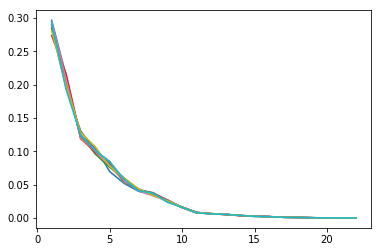

In [144]:
# Initialize seeds
seeds = []

import random

for i in range(10):
    seeds.append(random.randint(0, 1000))

# Select relevant columns
cols = ['NL_ACHT', 'WE_ACHT', 'NW_ACHT', 'EENP', 'MPZK', 'EENOUD', 'TWEEOUD', 'HH_GR', 'STED', 'MAN',
              'L014', 'L1425', 'L2544', 'L4564', 'H045', 'H4564', 'H6574', 'H7584', 'H8594', 'H9504', 'H0514', 'H1524', 'MULT_FAM']

data2 = create_combi(rep_data.copy(), cbs_data.copy(), 0.5, 0.5)

X = data2[cols]
y = data2['inef_bin']

# Scale data
from sklearn import preprocessing
X = X.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X.columns = cols

# Run PCA explained variance plot to decide on the number of PC's to include

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    pca = decomposition.PCA(random_state=i)
    pca.fit(X_train)
    X_data = pca.transform(X_train)
    
    x = pca.explained_variance_ratio_

    plt.plot(range(1, len(x)+1),x)

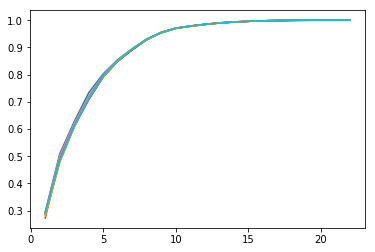

In [145]:
for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    pca = decomposition.PCA(random_state=i)
    pca.fit(X_train)
    X_data = pca.transform(X_train)
    
    x = pca.explained_variance_ratio_
    
    for i in range(len(x)):
        if i == 0:
            continue
        x[i] = x[i-1] + x[i]

    plt.plot(range(1, len(x)+1),x)